In [13]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [14]:
file_list = ['S006.csv','S008.csv','S009.csv','S010.csv','S012.csv','S013.csv','S014.csv','S015_fix.csv','S016.csv',
             'S017.csv','S018.csv','S019.csv','S020.csv','S021_fix.csv','S022.csv','S023_fix.csv','S024.csv','S025.csv',
             'S026.csv','S027.csv','S028.csv','S029.csv',]

In [15]:
# S006.csv        [00]
# S008.csv        [01]
# S009.csv        [02]
# S010.csv        [03]
# S012.csv        [04]
# S013.csv        [05]
# S014.csv        [06]
# S015_fix.csv    [07]
# S016.csv        [08]
# S017.csv        [09]
# S018.csv        [10]
# S019.csv        [11]
# S020.csv        [12]
# S021_fix.csv    [13]
# S022.csv        [14]
# S023_fix.csv    [15]
# S024.csv        [16]
# S025.csv        [17]
# S026.csv        [18]
# S027.csv        [19]
# S028.csv        [20]
# S029.csv        [21]

In [16]:
# Append all df's into a single combined dataframe
df_combined = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file))
    df_combined = pd.concat([df_combined, df])

df_combined = df_combined.drop('label', axis=1)

In [17]:
# # Αφαίρεση περιττών στηλών
# df = pd.read_csv(os.path.join('harth/', file_list[7]))
# df = df.drop('index', axis=1)
# df.to_csv('harth/S015_fix.csv', index=False)

In [18]:
# Δημιουργία πινάκων
df = pd.read_csv(os.path.join('harth/', file_list[0]))
df.head()
df.info()
df_combined.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408709 entries, 0 to 408708
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  408709 non-null  object 
 1   back_x     408709 non-null  float64
 2   back_y     408709 non-null  float64
 3   back_z     408709 non-null  float64
 4   thigh_x    408709 non-null  float64
 5   thigh_y    408709 non-null  float64
 6   thigh_z    408709 non-null  float64
 7   label      408709 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 24.9+ MB


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
count,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06,6.461328e+06
mean,-8.849574e-01,-1.326128e-02,-1.693779e-01,-5.948883e-01,2.087665e-02,3.749160e-01
std,3.775916e-01,2.311709e-01,3.647385e-01,6.263466e-01,3.884511e-01,7.360983e-01
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00
25%,-1.002393e+00,-8.312914e-02,-3.720700e-01,-9.742110e-01,-1.000873e-01,-1.557138e-01
50%,-9.748998e-01,2.593677e-03,-1.374510e-01,-4.217309e-01,3.262909e-02,7.004390e-01
75%,-8.123032e-01,7.251000e-02,4.647321e-02,-1.678755e-01,1.549512e-01,9.486747e-01
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00


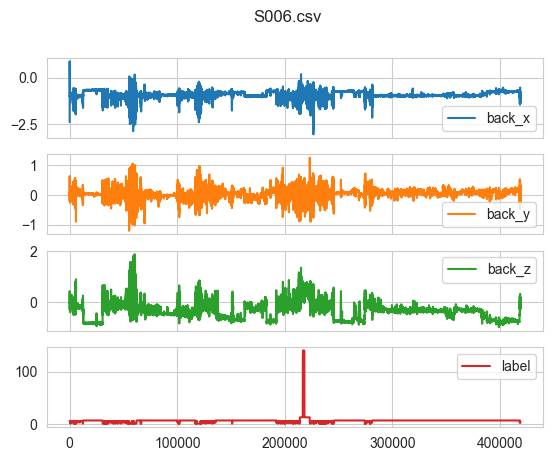

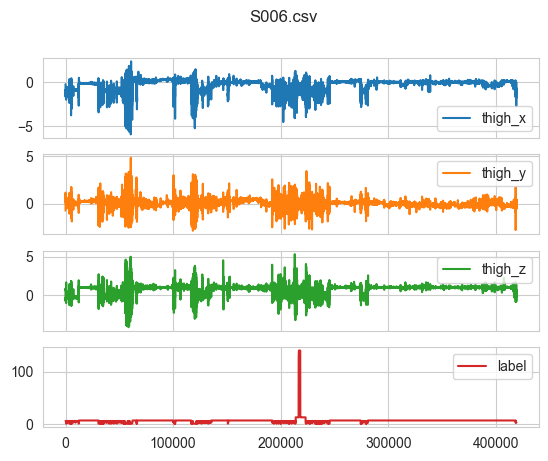

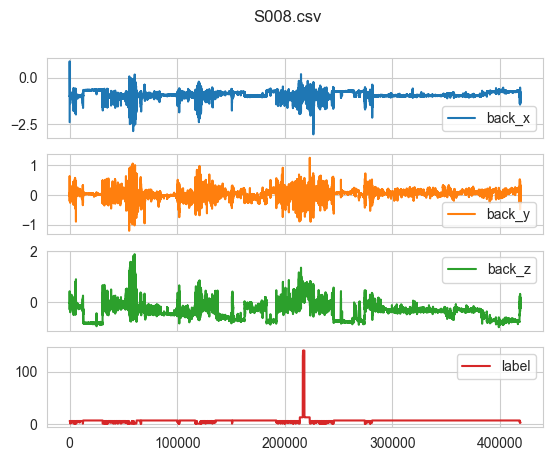

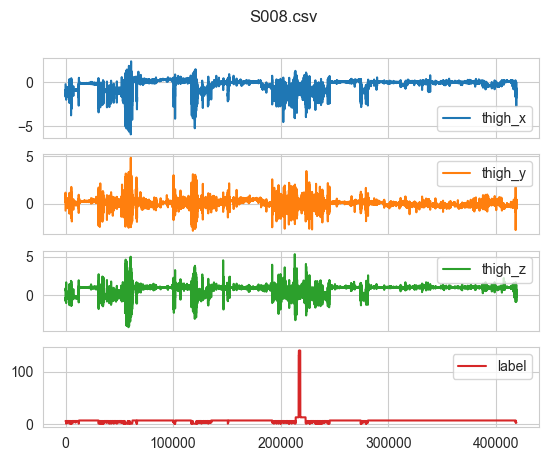

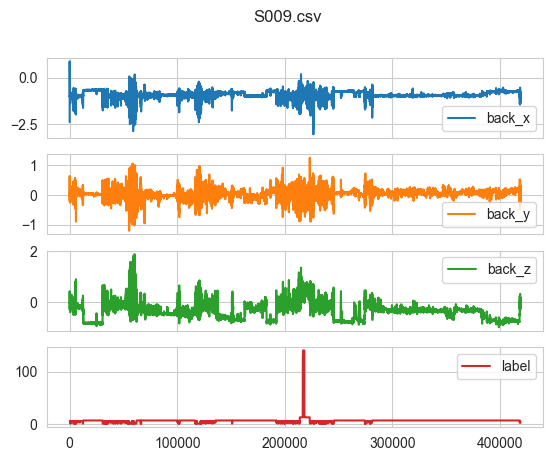

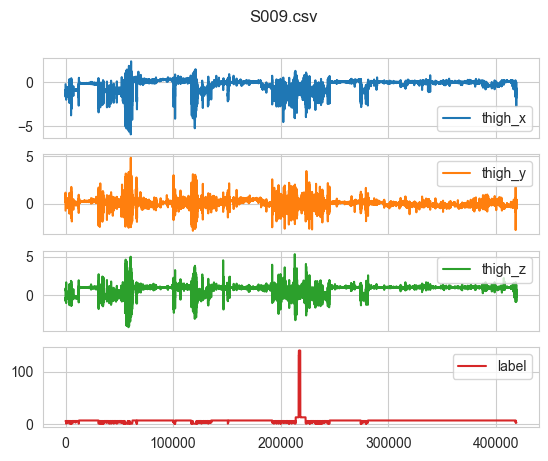

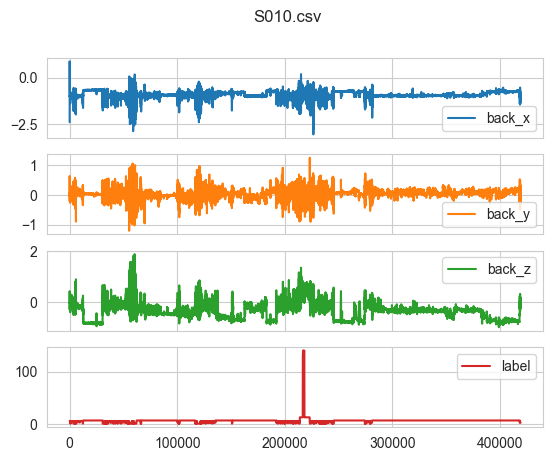

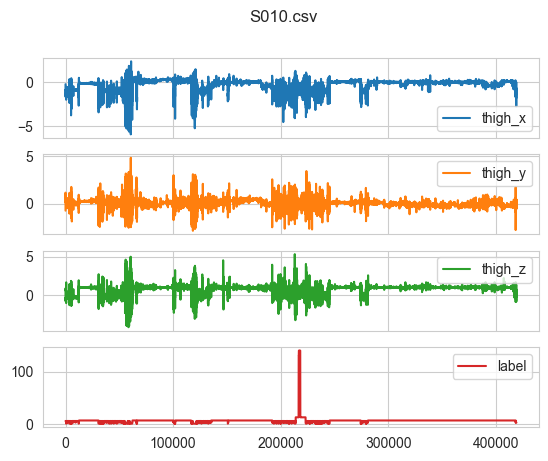

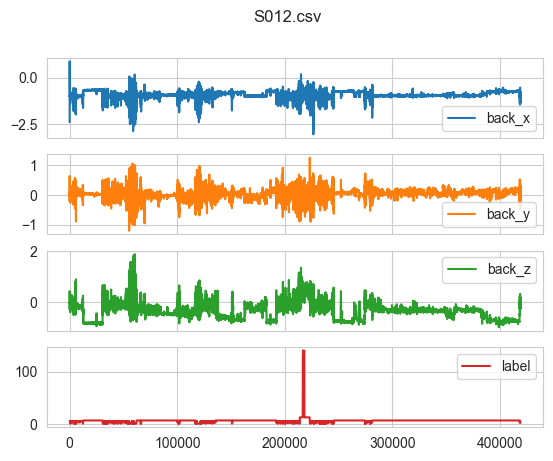

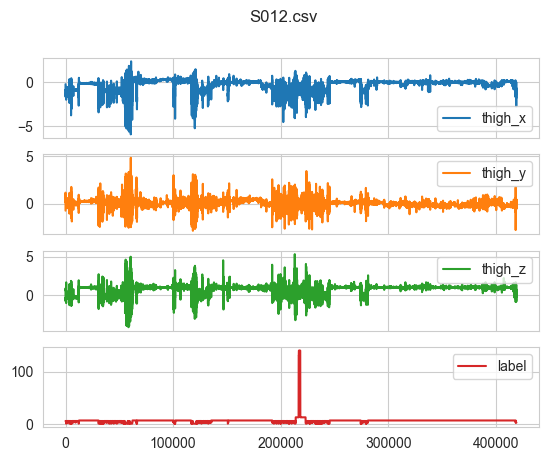

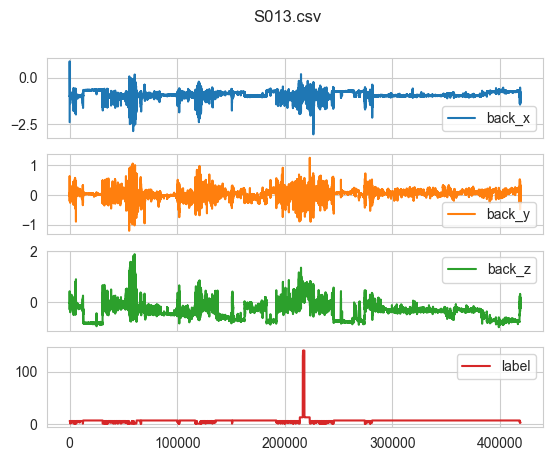

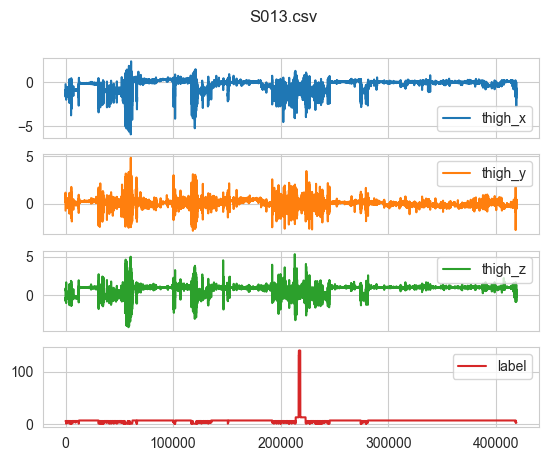

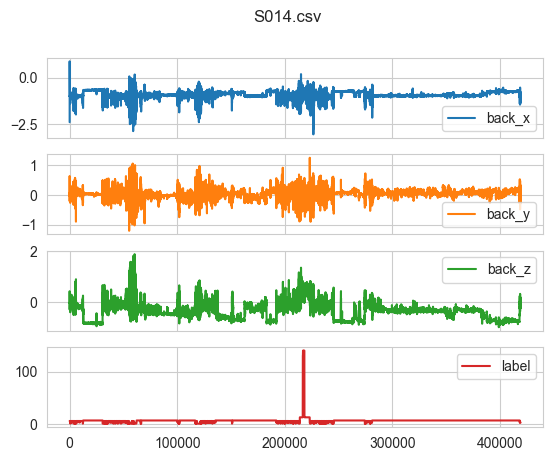

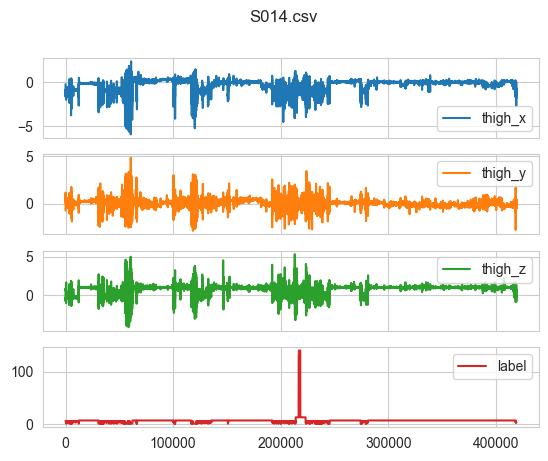

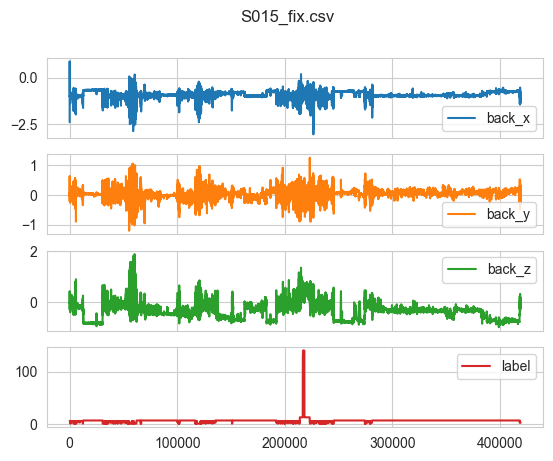

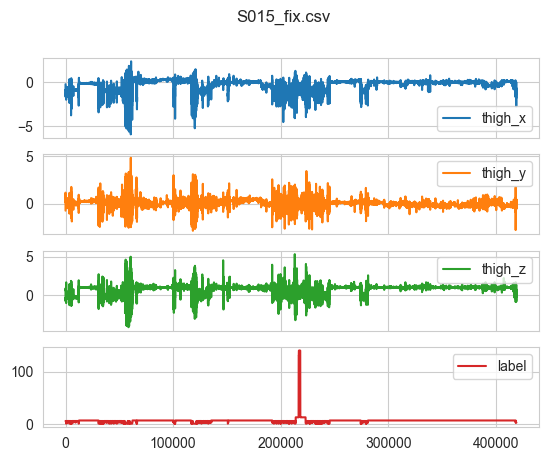

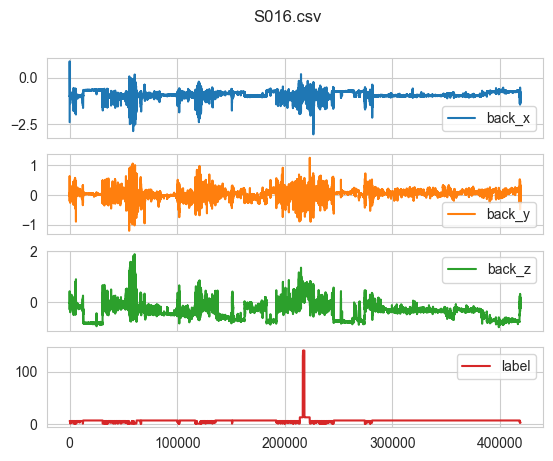

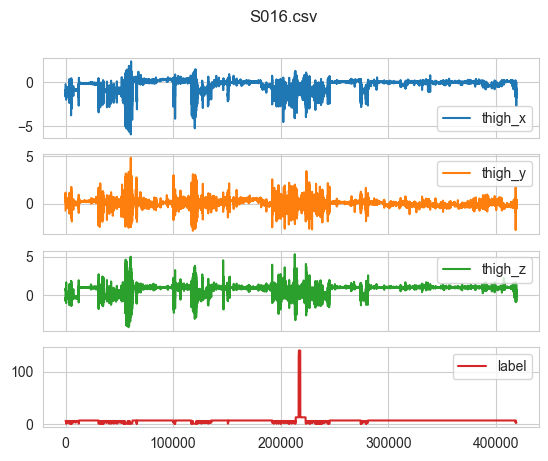

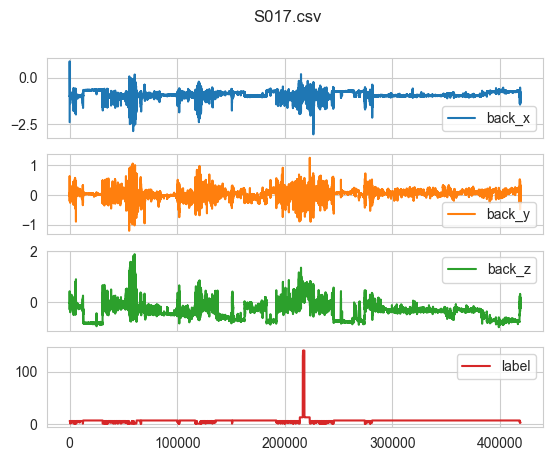

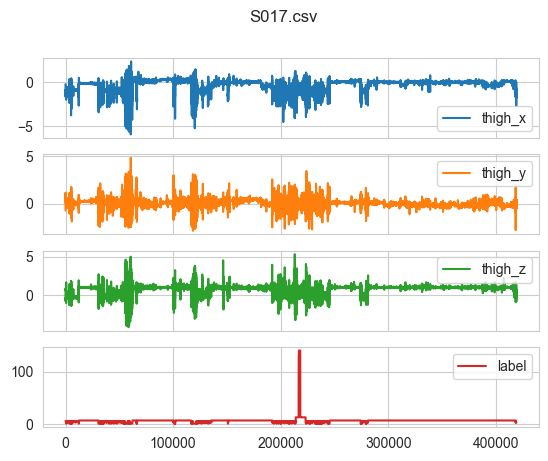

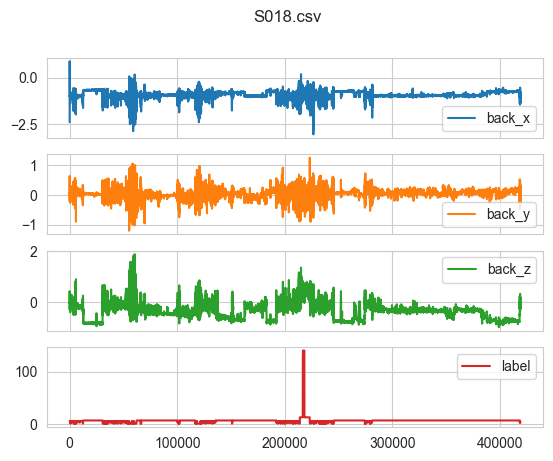

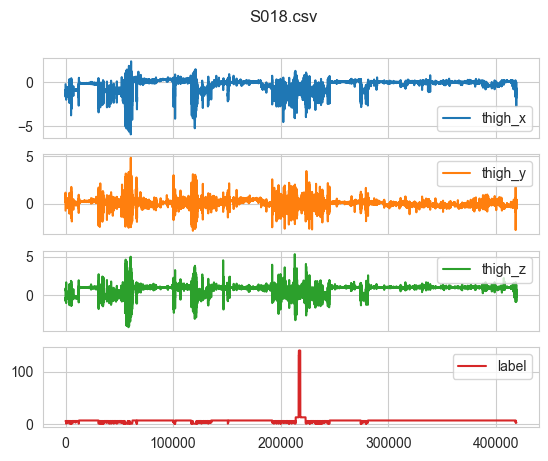

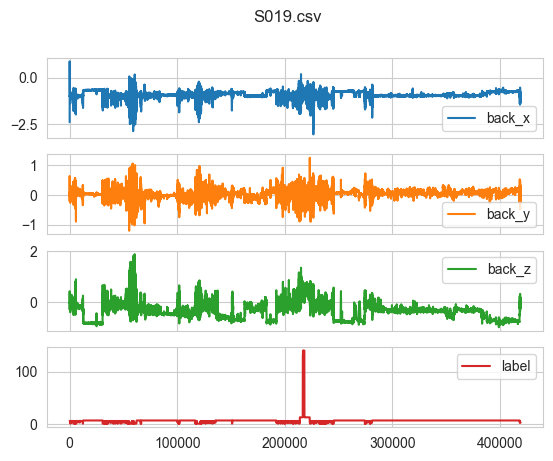

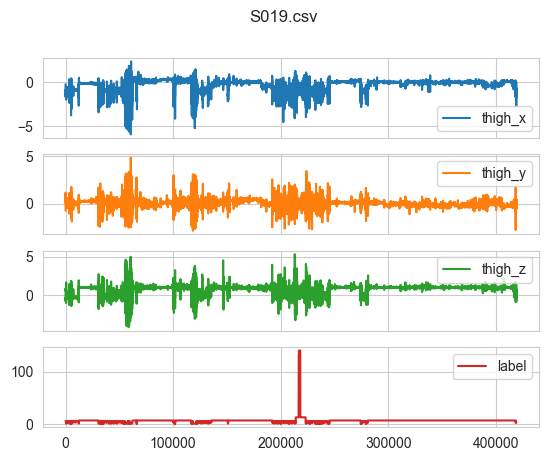

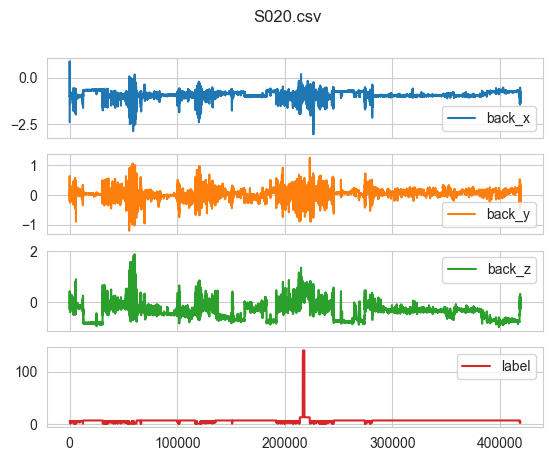

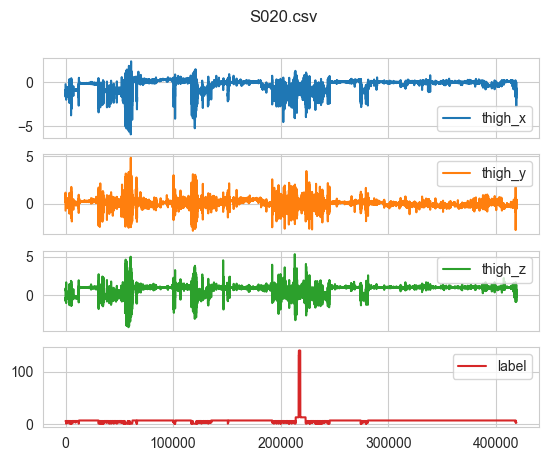

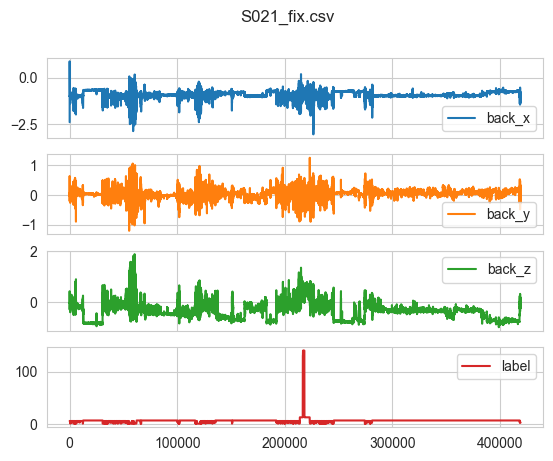

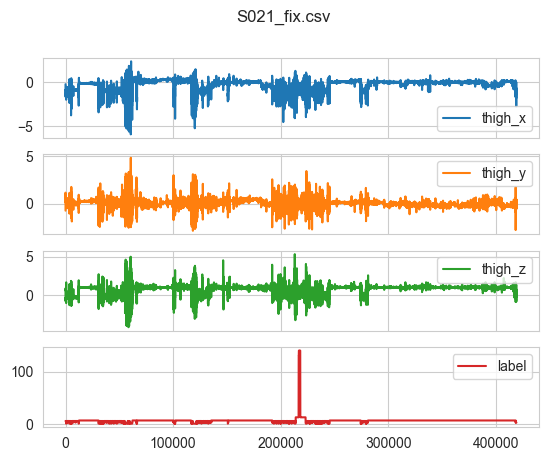

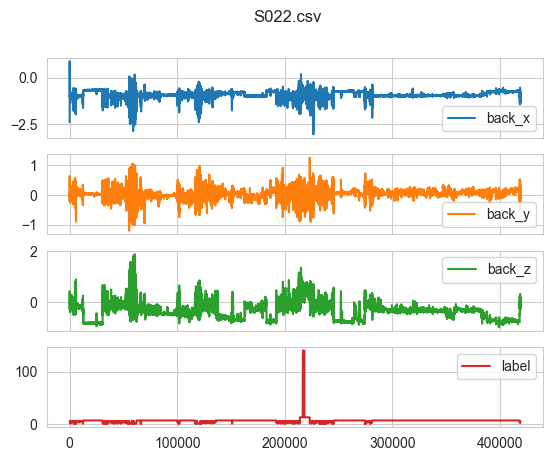

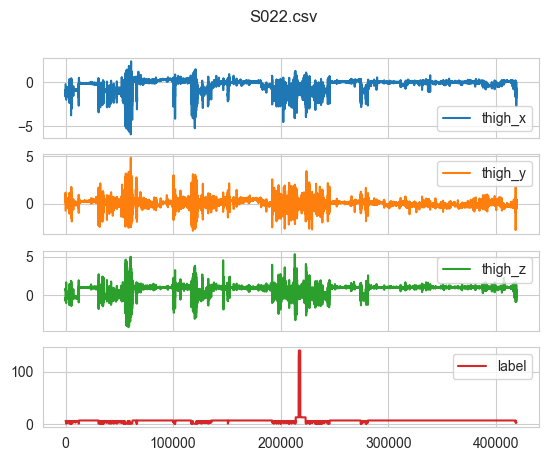

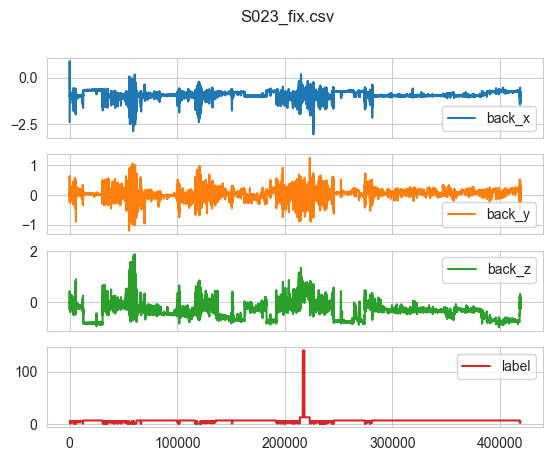

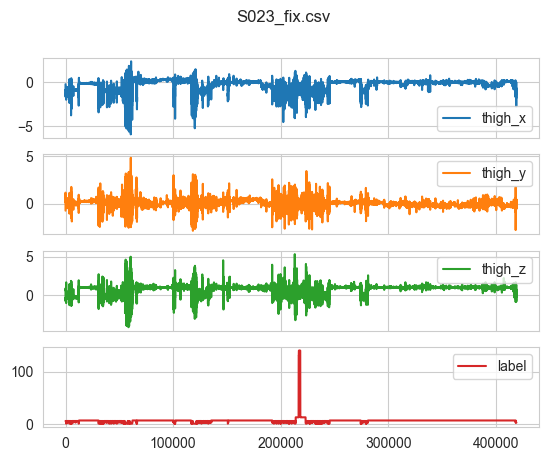

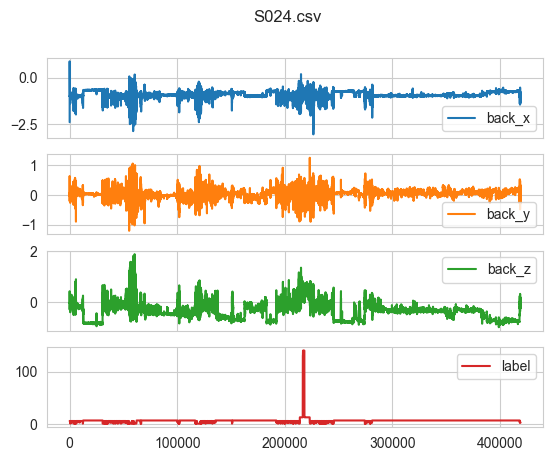

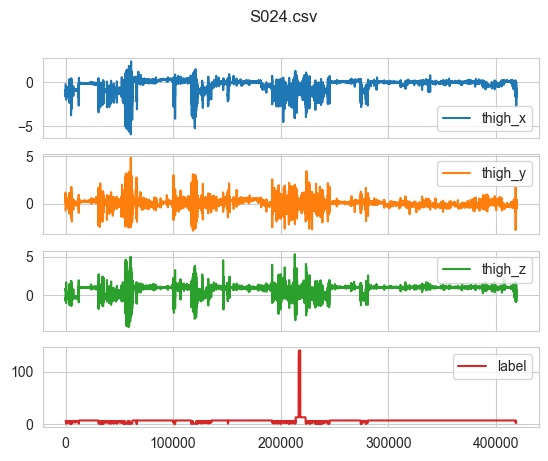

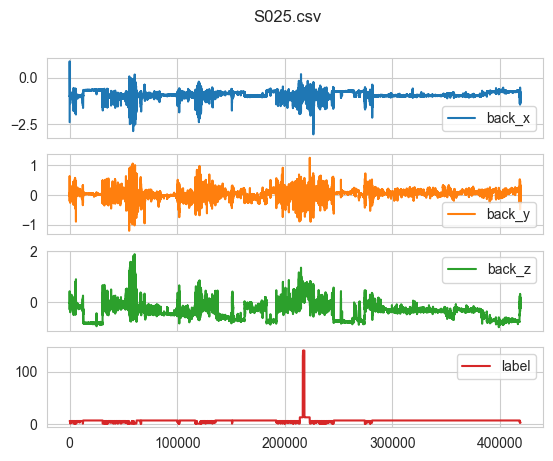

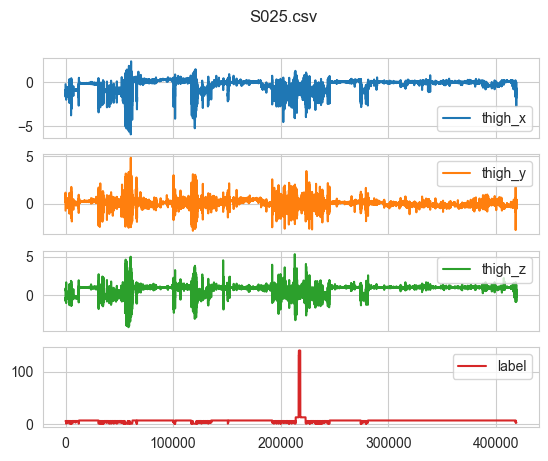

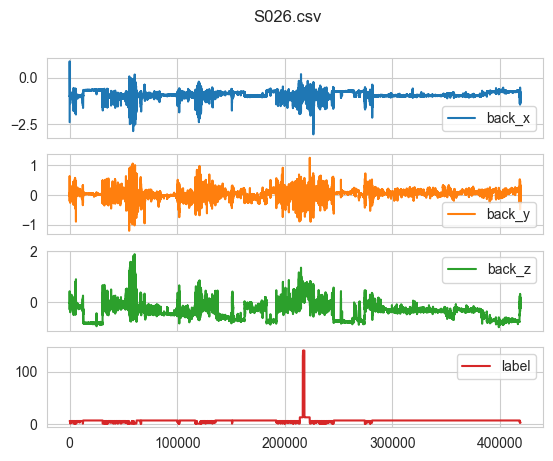

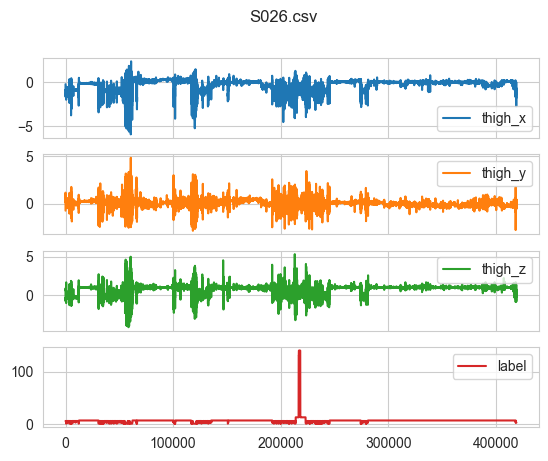

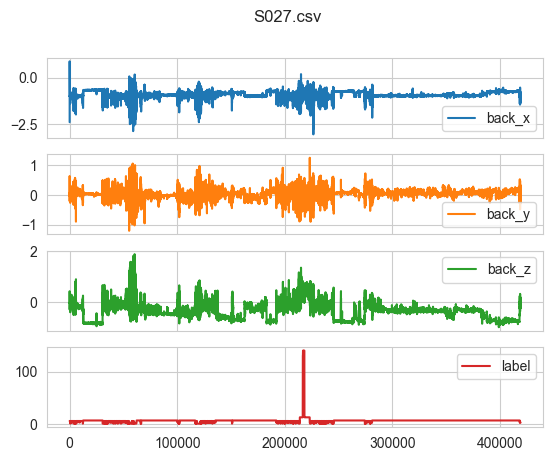

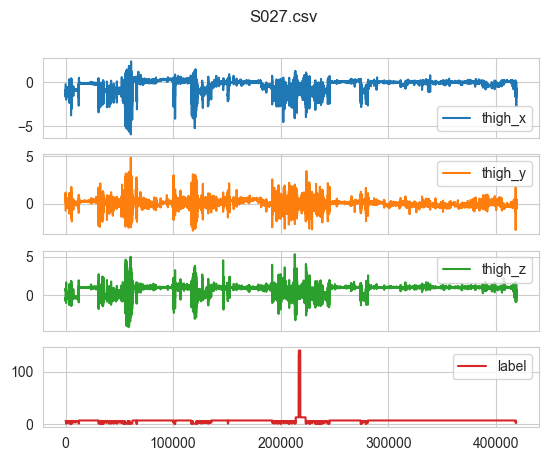

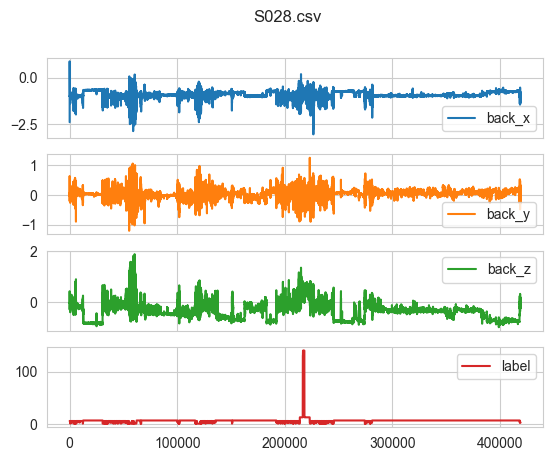

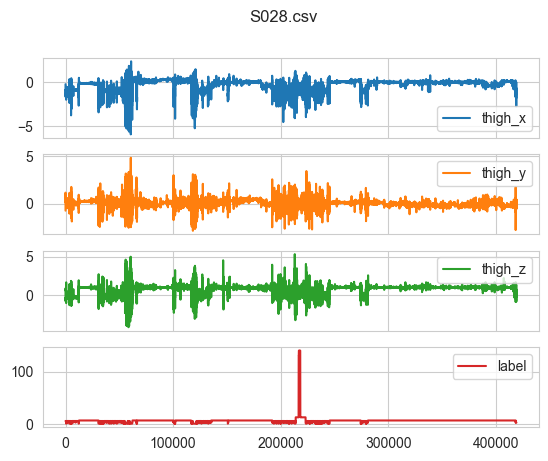

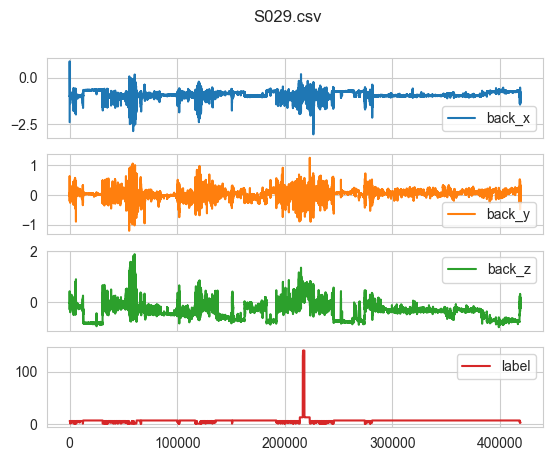

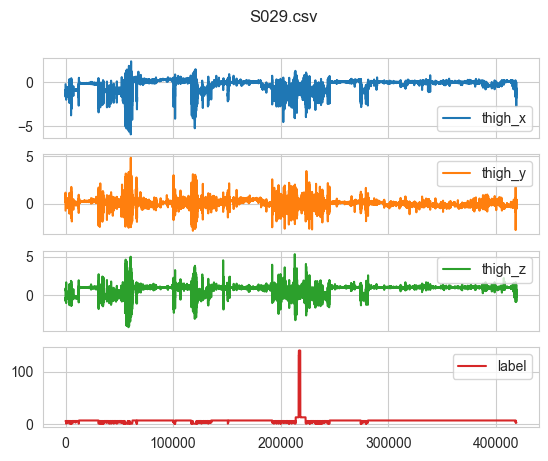

In [19]:
# Δημιουργία γραφημάτων
for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file_list[1]))
    df[['back_x','back_y', 'back_z', 'label']].plot(title= file, subplots=True)
    plt.show()
    df[['thigh_x','thigh_y', 'thigh_z', 'label']].plot(title= file, subplots=True)
    plt.show()

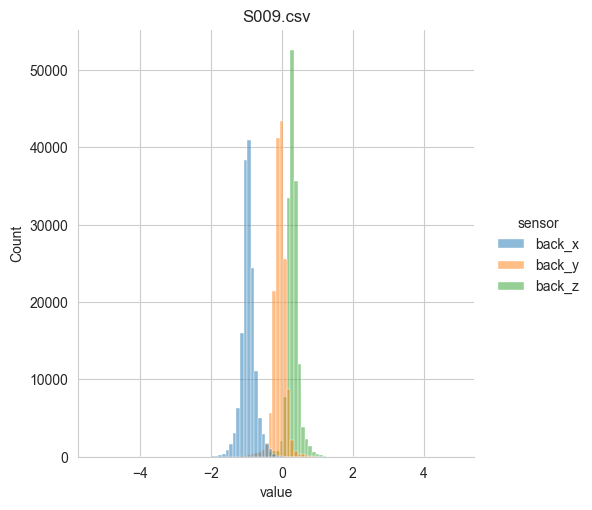

In [20]:
df = pd.read_csv(os.path.join('harth/', file_list[2]))

df_long = df[['back_x', 'back_y', 'back_z']].melt(var_name='sensor', value_name='value')
sns.displot(df_long, x='value', hue='sensor', kde=False, bins=100)
plt.title(file_list[2])
plt.show()

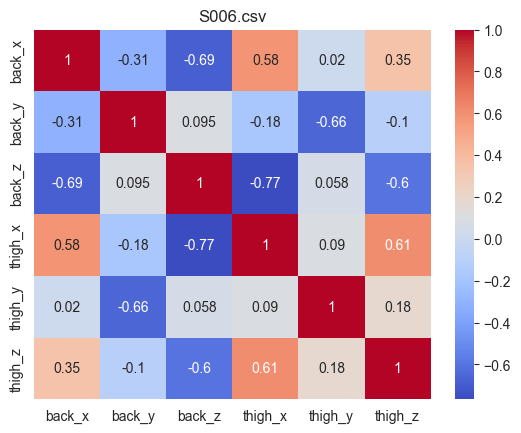

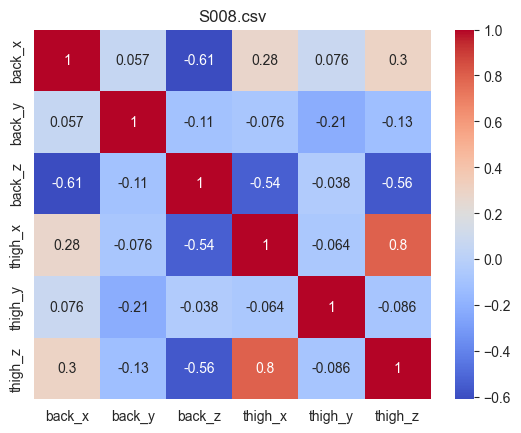

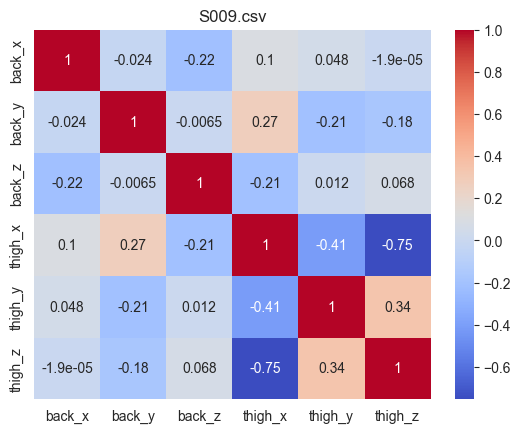

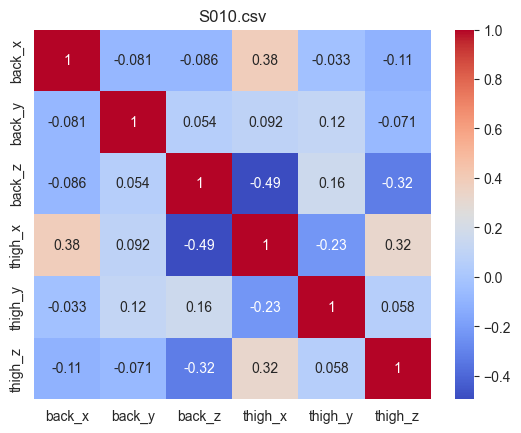

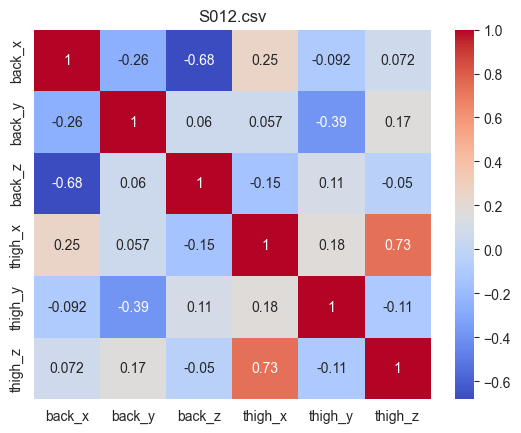

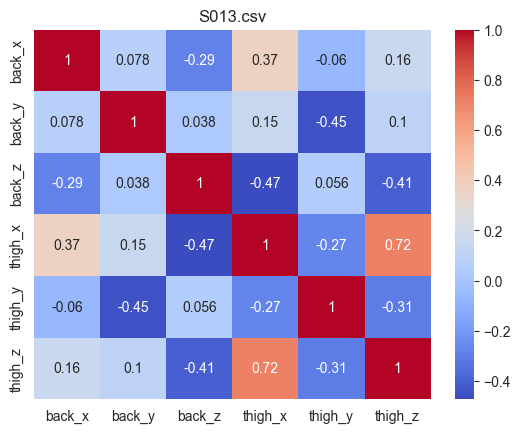

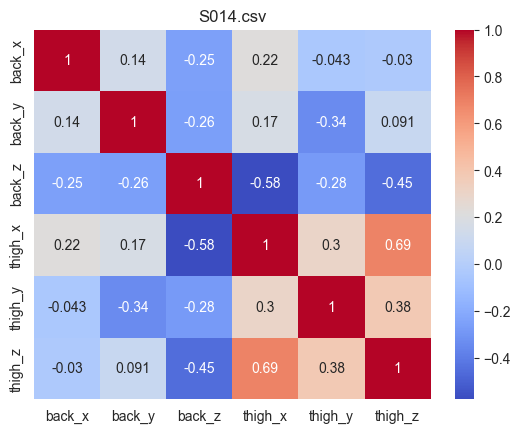

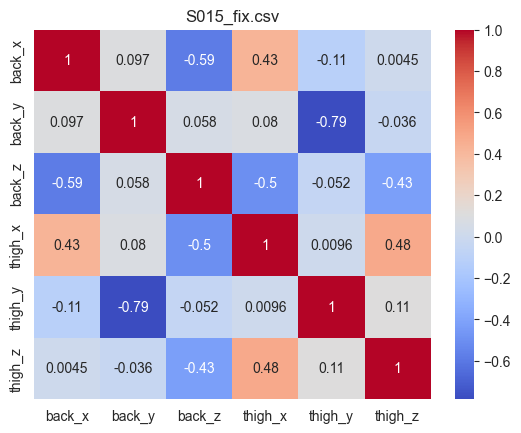

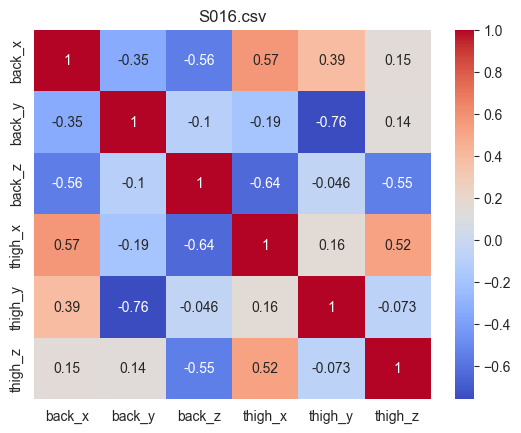

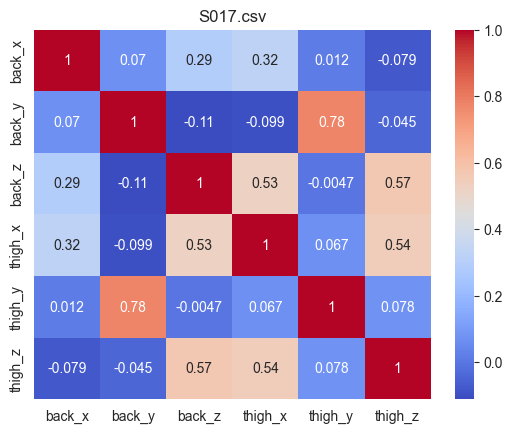

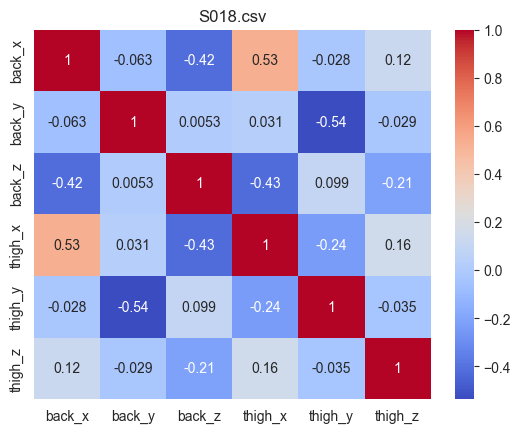

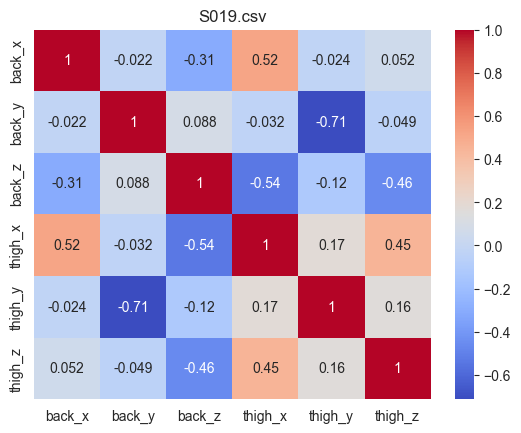

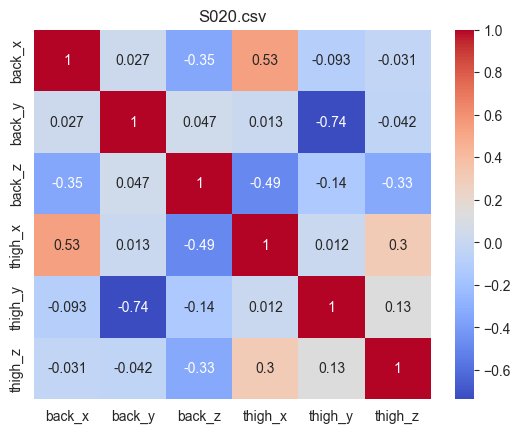

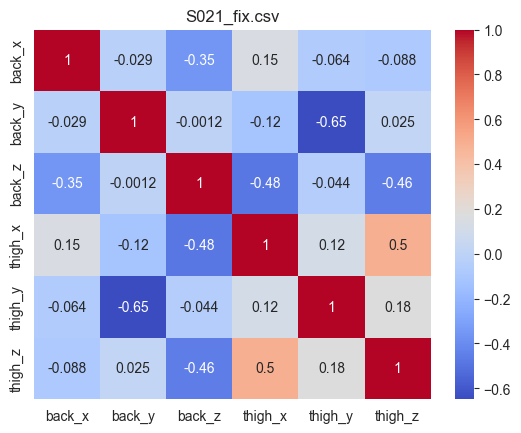

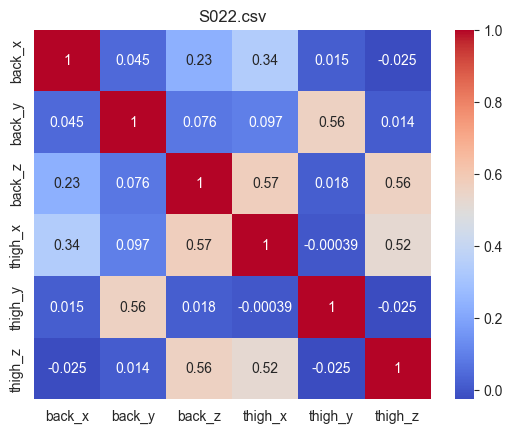

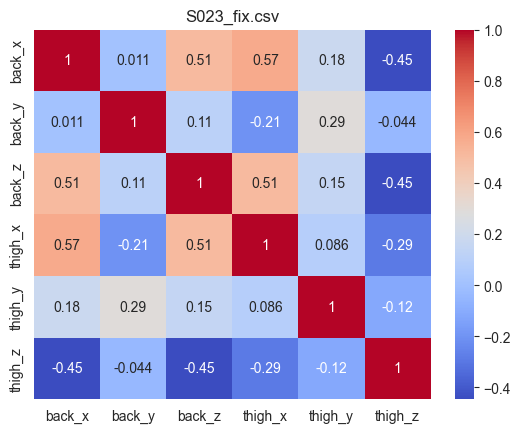

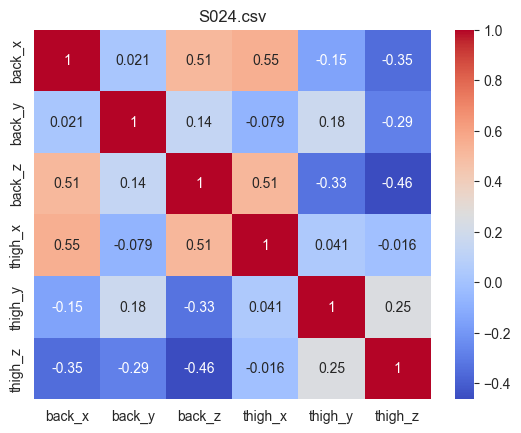

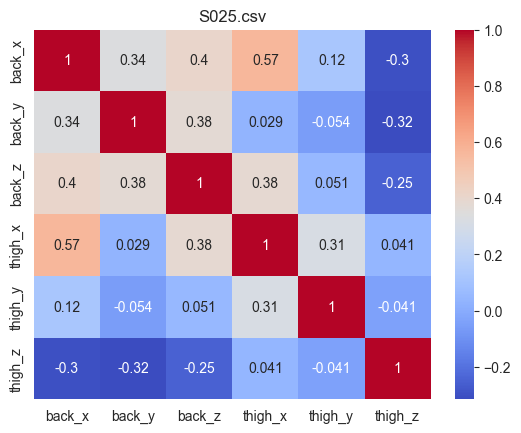

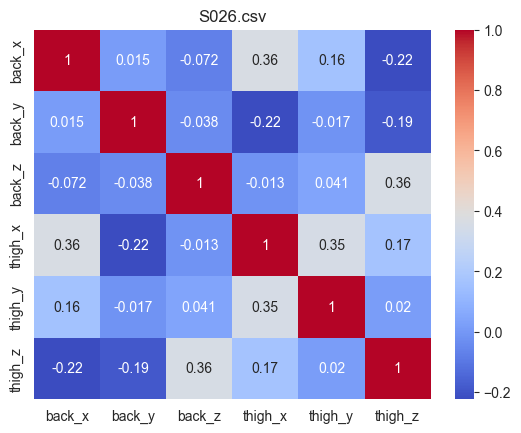

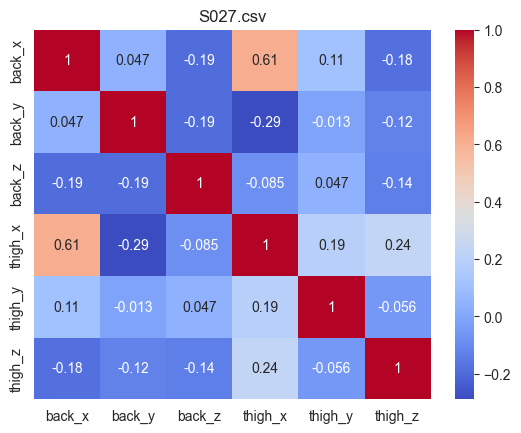

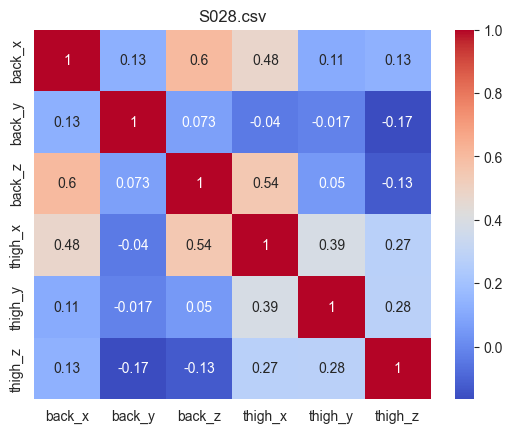

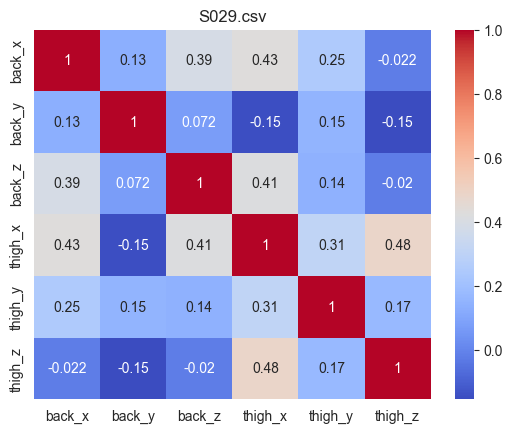

In [21]:
# Heatmaps
for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file))
    my_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
    df_selected = df[my_columns]
    
    corr_df = df_selected.corr()
    sns.heatmap(corr_df, annot=True, cmap='coolwarm')
    plt.title(file)
    
    # # Αποθήκευση σε αρχείο:
    # folder_path = 'Report/src/img/heatmaps'
    # fig_name = file.replace(".csv","") + '_heatmap.png'
    # plt.savefig(os.path.join(folder_path, fig_name))
    
    plt.show()